In [1]:
import json
import pip
pip.main(["install","yelp"])
pip.main(["install","textblob"])
from textblob import TextBlob
ckey = "DxWcdDWDAY8TeUfW1c6XLQ"
csecret = "VbOYpTA-60i-U1GqeRlSU6qcjL8"
token = "34gFepoCHayRLEctZuFaDpiapJ-NEe1D"
tokensecret = "rCW8MCDdiH4TLZIpBP9IN8TdVZ8"
from yelp.client import Client
from yelp.oauth1_authenticator import Oauth1Authenticator
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Authentication
auth = Oauth1Authenticator(
    consumer_key=ckey,
    consumer_secret=csecret,
    token=token,
    token_secret=tokensecret
)
api = Client(auth)

In [3]:
# Pass the parameters
params = {"term":"sushi","lang":"en","limit":200,"offset":0,"sort":1}
val = api.search("Newark, NJ",params)

In [4]:
# Create object
val.businesses

In [5]:
# Create an empty dataframe
df = pd.DataFrame()

In [7]:
# Add Name, Rating, Review Count and Reviews to the dataframe
for v in val.businesses:
    r = pd.Series([v.name,v.id,v.rating,v.review_count, api.get_business(v.id).business.reviews[0].excerpt])
    df = df.append(r, ignore_index=True)
    
# Rename the dataframe column
df.columns = ['Name','ID','Rating','Count', 'Reviews']
df

,Name,ID,Rating,Count,Reviews
0,Jimenez Tobacco,jimenez-tobacco-newark,5.0,50.0,Everyone must go and experience this establish...
1,Casa d'Paco,casa-d-paco-newark,4.5,258.0,My friends and I got so lucky to find this gem...
2,Sabor Unido,sabor-unido-newark,4.5,140.0,This is the wow factor!!!!!\nLocal local local...
3,Hero King Handcrafted Sandwiches,hero-king-handcrafted-sandwiches-newark,4.5,73.0,One of the best places in Newark and Essex Cou...
4,Sushi House 21,sushi-house-21-newark-2,4.5,111.0,This place is everything you'd dream for in a ...
5,Dario's Restaurant,darios-restaurant-newark,4.5,127.0,Dario's is the only place I go to for food in ...
6,The Green Chicpea,the-green-chicpea-newark-2,4.5,108.0,I was introduced to this place by my colleague...
7,Burger Walla,burger-walla-newark,4.5,162.0,Decided to check out Burger Walla based on a V...
8,Hobby's Delicatessen & Restaurant,hobbys-delicatessen-and-restaurant-newark,4.5,156.0,I love this place. It's old school NYC deli -...
9,Munchies by Antonio,munchies-by-antonio-newark,4.5,41.0,"Right off the bat, I have to say that the owne..."


In [8]:
# Loop through each review run the sentiment analysis on each sentence
polarity = []
subjectivity = []
for sen in df['Reviews']:
    polarity.append(TextBlob(sen).sentiment.polarity)
    subjectivity.append(TextBlob(sen).sentiment.subjectivity)

In [9]:
# Store the polarity and subjectivity into another data table
df_final = pd.DataFrame({'Polarity' : polarity, 'Subjectivity' : subjectivity})
df_final

,Polarity,Subjectivity
0,0.175000,0.616667
1,0.234848,0.643939
2,0.041035,0.240000
3,0.406667,0.403333
4,0.300000,0.577778
5,0.550000,0.650000
6,0.000000,0.750000
7,0.000000,0.000000
8,0.266667,0.366667
9,0.442857,0.717857


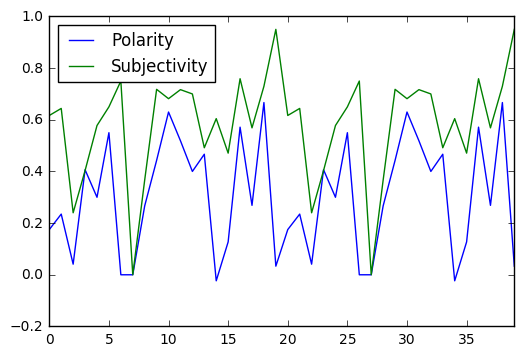

In [10]:
# Plot polarity and subjectivity
%matplotlib inline
import matplotlib.pyplot as plt
df_final.plot()